# Code implementation


# Importing all useful modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

In [ ]:

url = "https://raw.githubusercontent.com/AdityaM-23/project_24/main/Distillation%20Column%20Dataset.xlsx%20-%20Sheet2.csv"

df = pd.read_csv(url)
df.head()


,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.501001,0.498999,76.803959,104.148959,110.216959,67.038059,0.798463,0,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.501001,0.498999,76.437645,103.977045,110.045045,66.866145,0.800811,0,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.501001,0.498999,77.041465,104.608865,110.676865,67.497965,0.803544,0,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.501001,0.498999,77.016096,104.609296,110.677296,67.498396,0.807065,0,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.501001,0.498999,77.252293,104.864693,110.932693,67.753793,0.811774,0,0.965784,0.034216


 Checking any NaN values

In [ ]:
df.isna().sum()

Time              0
Sensor1           0
Sensor2           0
Sensor3           0
Sensor4           0
Sensor5           0
Sensor6           0
Sensor7           0
Sensor8           0
Sensor9           0
Sensor10          0
Sensor11          0
Sensor12          0
Sensor13          0
Sensor14          0
Sensor15          0
Sensor16          0
MoleFractionTX    0
MoleFractionHX    0
dtype: int64

we can see that 'Sensor9' has same values in all rows because the mole fraction of feed is constant. To check whether other columns have the similar case.


In [ ]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print( {col} )

{'Sensor9'}
{'Sensor10'}
{'Sensor16'}





*  'Sensor9'  : feed mole fraction before
*  'Sensor10' : Feed mole fraction after
*  'Sensor16' : Duties Summary

So, data of these columns is of no use.Dropping those columns will help to analyse the data better.

In [ ]:
df=df.drop(['Sensor9'], axis=1)
df=df.drop(['Sensor10'], axis=1)
df=df.drop(["Sensor16"], axis=1)
df.head()

,Time,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,MoleFractionTX,MoleFractionHX
0,0,49.718959,101.414959,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,76.803959,104.148959,110.216959,67.038059,0.798463,0.966281,0.033719
1,30,49.561845,100.962045,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,76.437645,103.977045,110.045045,66.866145,0.800811,0.965788,0.034212
2,60,50.189365,101.490865,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,77.041465,104.608865,110.676865,67.497965,0.803544,0.965758,0.034242
3,90,50.183496,101.403296,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,77.016096,104.609296,110.677296,67.498396,0.807065,0.965756,0.034244
4,120,50.428793,101.603693,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,77.252293,104.864693,110.932693,67.753793,0.811774,0.965784,0.034216


Outlier removal

In [ ]:


def remove_outliers(df, threshold=3):
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()

    # Iterate over each column in the DataFrame
    for col in df_cleaned.columns:
        # Calculate Z-score for each value in the column
        z_scores = np.abs((df_cleaned[col] - df_cleaned[col].mean()) / df_cleaned[col].std())

        # Identify outliers based on the Z-score threshold
        outliers = df_cleaned[z_scores > threshold][col]

        # Replace outliers with NaN
        df_cleaned.loc[z_scores > threshold, col] = np.nan

    # Drop rows containing NaN values
    df_cleaned = df_cleaned.dropna()

    return df_cleaned

df = remove_outliers(df)


Checking for the correlation.

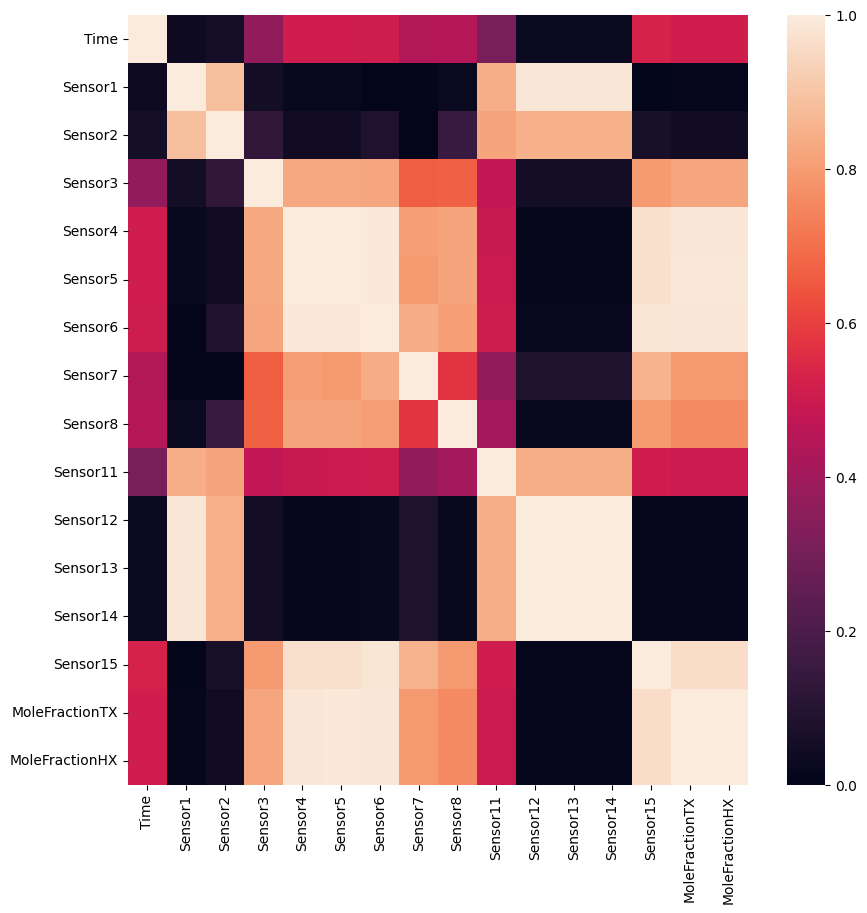

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(df.corr()),vmin=0, vmax=1)
plt.show()

In [ ]:
df["tot"]=df["MoleFractionTX"]+df["MoleFractionHX"]
df['tot'].all() == 1

True

From the above code, we can deduce that sum of molefraction of toluene and hexane is unity for the whole data. So, we shall take molefraction of Toluene for training of model.


In [ ]:
Column=df[["Time","Sensor3","Sensor4","Sensor5","Sensor6","Sensor7","Sensor8","Sensor15","MoleFractionTX"]]
Column


,Time,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor15,MoleFractionTX
0,0.0,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.798463,0.966281
1,30.0,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.800811,0.965788
2,60.0,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.803544,0.965758
3,90.0,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.807065,0.965756
4,120.0,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.811774,0.965784
...,...,...,...,...,...,...,...,...,...
956,28680.0,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.792092,0.964851
957,28710.0,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.792288,0.964852
958,28740.0,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.792515,0.964853
959,28770.0,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.792525,0.964853


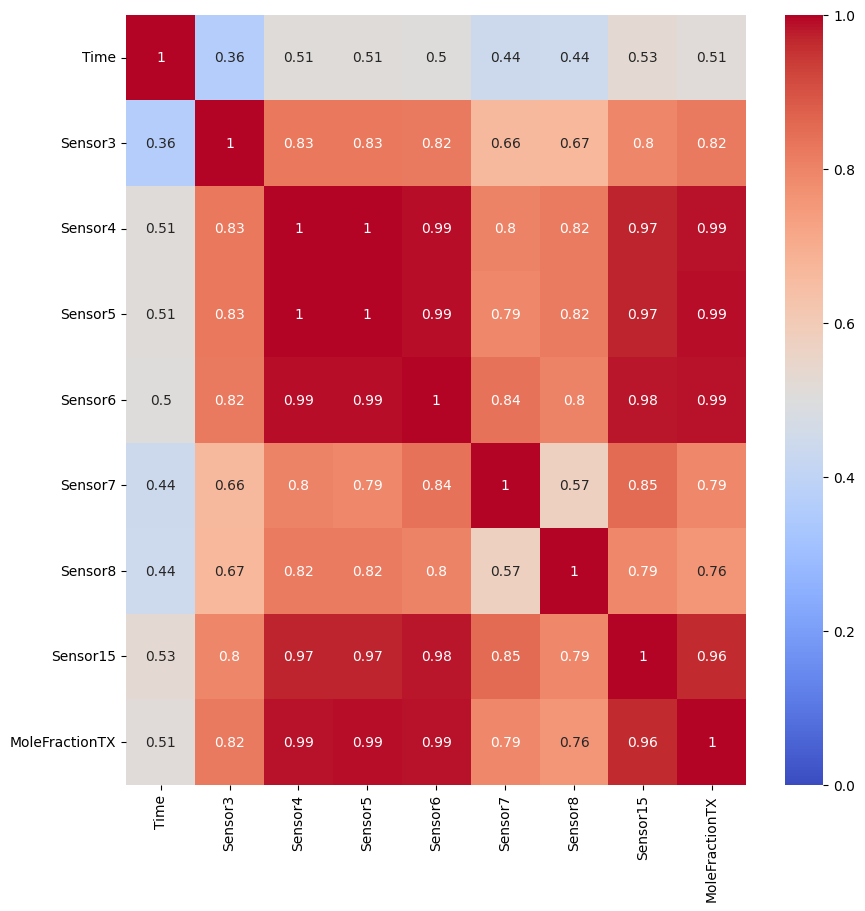

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(Column.corr()),vmin=0, vmax=1,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
x = Column.iloc[:,0:8]
y = Column[["MoleFractionTX"]]
x

,Time,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor15
0,0.0,49.718959,3693.858959,6695.368959,2924.818959,1048.588959,0.054394,0.798463
1,30.0,49.541545,3712.947045,6629.637045,2767.487045,1046.987045,0.054233,0.800811
2,60.0,50.145165,3718.008865,6692.598865,2763.018865,1050.988865,0.053941,0.803544
3,90.0,50.142796,3721.819296,6702.869296,2754.009296,1051.449296,0.053968,0.807065
4,120.0,50.406093,3724.444693,6710.444693,2744.244693,1052.674693,0.054121,0.811774
...,...,...,...,...,...,...,...,...
956,28680.0,54.520579,3783.434579,6808.374579,2782.764579,1052.594579,0.054906,0.792092
957,28710.0,55.073908,3783.905308,6809.155308,2782.875308,1053.235308,0.054913,0.792288
958,28740.0,55.234278,3784.033378,6809.343378,2783.673378,1053.403378,0.054925,0.792515
959,28770.0,54.974485,3783.671285,6808.931285,2782.991285,1053.181285,0.054930,0.792525


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Column['Time'] = MinMaxScaler().fit_transform(np.array(Column['Time']).reshape(-1,1))

<ipython-input-67-47982d559ded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Column['Time'] = MinMaxScaler().fit_transform(np.array(Column['Time']).reshape(-1,1))


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 6)
y_train

,MoleFractionTX
797,0.977076
355,0.951789
343,0.951791
886,0.965665
697,0.971223
...,...
376,0.951785
647,0.971218
233,0.958280
747,0.975955


###  Decision Tree Regression

In [ ]:

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Mean Squared Error: 1.425142663043469e-07
Mean Absolute Error: 8.141847826088176e-05
R-squared: 0.9981087665915161


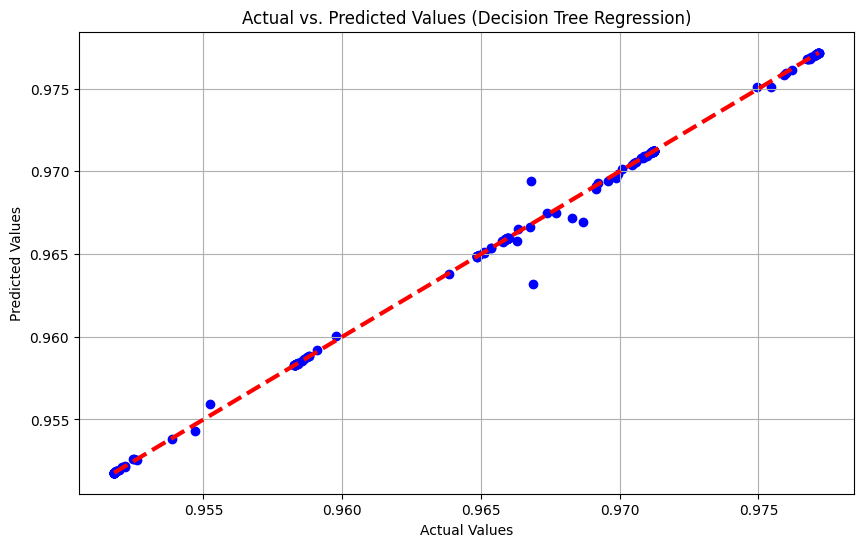

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree Regression)')
plt.grid(True)
plt.show()

###  Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

<ipython-input-72-1b6fb213281b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Evaluting the model

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Mean Squared Error: 5.5783940608156506e-08
Mean Absolute Error: 5.624798913031892e-05
R-squared: 0.9992597200626236


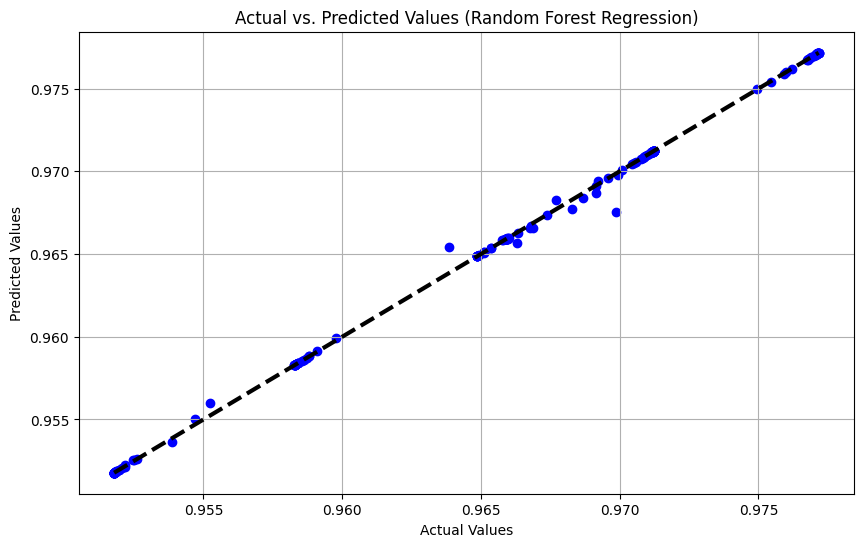

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regression)')
plt.grid(True)
plt.show()

# Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Performing grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluating the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


<ipython-input-76-34f0db8fa7e7>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


Mean Squared Error: 6.395399185218563e-08
Mean Absolute Error: 5.40274999998549e-05
R-squared: 0.9991512995215619
